In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    GridSearchCV,
    ShuffleSplit,
)
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import VotingRegressor


In [2]:
# Предпроцессинг данных
cancer = load_breast_cancer()

df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer['target']

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

In [3]:
# Линейная Регрессия
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
score_lin_reg = lin_reg.score(X_test, y_test)

cross_result_lin_reg = cross_val_score(lin_reg, X, y, cv=cv)
avg_cross_result_lin_reg = np.average(cross_result_lin_reg)

parameters = {'n_jobs': [i for i in range(0, 100)]}
grid_result_lin_reg = GridSearchCV(lin_reg, parameters).fit(X_train, y_train).best_score_

print(f'Обычное обучение: {score_lin_reg}')
print(f'Кросс валидация: {avg_cross_result_lin_reg}')
print(f'Решетчатый поиск: {grid_result_lin_reg}')


Обычное обучение: 0.7667939491249669
Кросс валидация: 0.7391669165696337
Решетчатый поиск: 0.7067876669778308


In [4]:
# Ridge Регрессия
lin_reg_ridge = Ridge()
lin_reg_ridge.fit(X_train, y_train)
score_lin_reg_ridge = lin_reg_ridge.score(X_test, y_test)

cross_result_lin_reg_ridge = cross_val_score(lin_reg_ridge, X, y, cv=cv)
avg_cross_result_lin_reg_ridge = np.average(cross_result_lin_reg_ridge)

parameters = {'alpha': [i for i in range(0, 100)]}
grid_result_lin_reg_ridge = GridSearchCV(lin_reg_ridge, parameters).fit(X_train, y_train).best_score_

print(f'Обычное обучение: {score_lin_reg_ridge}')
print(f'Кросс валидация: {avg_cross_result_lin_reg_ridge}')
print(f'Решетчатый поиск: {grid_result_lin_reg_ridge}')


Обычное обучение: 0.7280413297588749
Кросс валидация: 0.7260644135143787
Решетчатый поиск: 0.7145736211062921


In [5]:
# Lasso Регрессия
lin_reg_lasso = Lasso()
lin_reg_lasso.fit(X_train, y_train)
score_lin_reg_lasso = lin_reg_lasso.score(X_test, y_test)

cross_result_lin_reg_lasso = cross_val_score(lin_reg_lasso, X, y, cv=cv)
avg_cross_result_lin_reg_lasso = np.average(cross_result_lin_reg_lasso)

parameters = {'alpha': [1, 100]}
grid_result_lin_reg_lasso = GridSearchCV(lin_reg_lasso, parameters).fit(X_train, y_train).best_score_

print(f'Обычное обучение: {score_lin_reg_lasso}')
print(f'Кросс валидация: {avg_cross_result_lin_reg_lasso}')
print(f'Решетчатый поиск: {grid_result_lin_reg_lasso}')


Обычное обучение: 0.5480177716882566
Кросс валидация: 0.5079051695881083
Решетчатый поиск: 0.5254667299552512


In [ ]:
# Выводим результаты в общей таблице
# results = pd.DataFrame({
#     'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression'],
#     'Обычное обучение': [score_lin_reg, score_lin_reg_ridge, score_lin_reg_lasso],
#     'Кросс валидация': [avg_cross_result_lin_reg, avg_cross_result_lin_reg_ridge, avg_cross_result_lin_reg_lasso],
#     'Решетчатый поиск': [grid_result_lin_reg, grid_result_lin_reg_ridge, grid_result_lin_reg_lasso],
# })
# print(results)


In [6]:
model_mean = np.mean([score_lin_reg, score_lin_reg_lasso, score_lin_reg_ridge])

estimators = [('lin_reg', lin_reg), ('lin_reg_ridge', lin_reg_ridge), ('lin_reg_lasso', lin_reg_lasso)] # создание коллектива моделей
ensemble = VotingRegressor(estimators)
ensemble.fit(X_train, y_train) # обучение коллектива/ансамбля
score_voting = ensemble.score(X_test, y_test) # оценка обучения коллектива
print(f'Model mean: {model_mean}')
print(f'Voting: {score_voting}')


y_pred_ensemble = ensemble.predict(X_test)
y_pred_ridge = lin_reg_ridge.predict(X_test)


Model mean: 0.6809510168573661
Voting: 0.7260082402054073


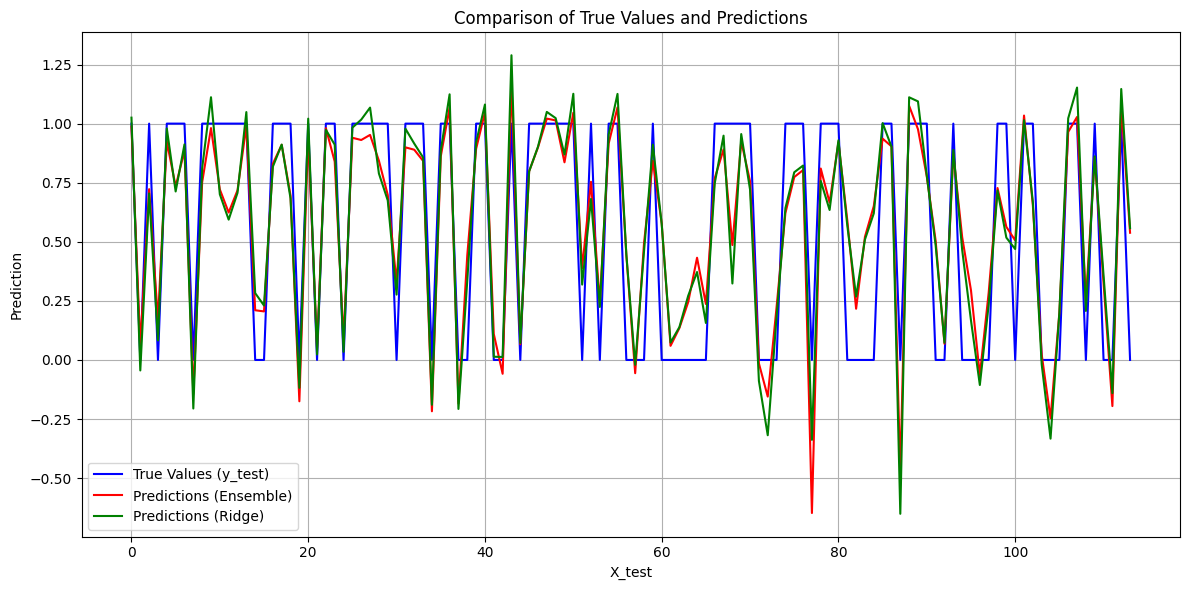

In [7]:
# Create an array representing the indices of X_test for the x-axis
x_indices = np.arange(len(X_test))

plt.figure(figsize=(12, 6))

plt.plot(x_indices, y_test.values, label='True Values (y_test)', color='b')
plt.plot(x_indices, y_pred_ensemble, label='Predictions (Ensemble)', color='r')
plt.plot(x_indices, y_pred_ridge, label='Predictions (Ridge)', color='g')

plt.title('Comparison of True Values and Predictions')
plt.xlabel('X_test')
plt.ylabel('Prediction')
plt.legend()

plt.grid()
plt.tight_layout()
plt.show()
